# Exploratory Data Analysis

In [1]:
########################### Import Requisite Libraries #########################
import pandas as pd
import numpy as np
import os
import sys
import pprint
import warnings
import textwrap

################################################################################
# Add the parent directory to sys.path to access 'functions.py'
sys.path.append(os.path.join(os.pardir))
from py_scripts.functions import *

################################################################################
print("Python version:")
print(sys.version)
print()
print(f"Pandas Version = {pd.__version__}")
print(f"Numpy Version = {np.__version__}")

Python version:
3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]

Pandas Version = 2.2.2
Numpy Version = 1.26.4


In [2]:
base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to the parent directory, then into the 'data' folder
data_path = os.path.join(os.pardir, "data")
data_output = os.path.join(os.pardir, "data_output")

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
ensure_directory(data_path)
ensure_directory(data_output)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

# Read the file into a DataFrame
df_eda = pd.read_excel(os.path.join(data_path, "KFRE_CKD_raw.xlsx"))

Directory exists: ..\data
Directory exists: ..\data_output
Directory exists: ..\images\png_images
Directory exists: ..\images\svg_images


In [3]:
df_eda.head()  # inspect first 5 rows of data

,Age,SEX,HTN,DM,GFR,ACR,Ca,P,Alb,TCO2,ESRD,ESRD_dur
0,61,1,1,0,9.148234,10.0,6.0,4.0,2.6,16.0,0,2086
1,66,1,1,0,7.316171,0.0,7.7,6.5,3.5,14.0,1,3
2,70,1,1,0,10.124995,0.0,7.5,3.8,3.2,17.0,1,93
3,49,0,0,0,7.627585,0.0,8.5,5.4,4.3,23.0,1,138
4,54,1,1,1,11.335170,0.0,8.0,5.1,2.9,20.0,1,311


## Create Random Patient ID for Indexing

In [4]:
df_eda = add_ids(df_eda, column_name="Patient_ID", seed=222)

In [5]:
df_eda.head()  # inspect first 5 rows of data

,Age,SEX,HTN,DM,GFR,ACR,Ca,P,Alb,TCO2,ESRD,ESRD_dur
Patient_ID,,,,,,,,,,,,
723027400,61,1,1,0,9.148234,10.0,6.0,4.0,2.6,16.0,0,2086
904532344,66,1,1,0,7.316171,0.0,7.7,6.5,3.5,14.0,1,3
890205650,70,1,1,0,10.124995,0.0,7.5,3.8,3.2,17.0,1,93
317865962,49,0,0,0,7.627585,0.0,8.5,5.4,4.3,23.0,1,138
968356501,54,1,1,1,11.335170,0.0,8.0,5.1,2.9,20.0,1,311


## Inspect Data Types

In [6]:
data_types(df_eda)

,Column/Variable,Data Type,# of Nulls,Percent Null
0,Age,int64,0,0.0
1,SEX,int64,0,0.0
2,HTN,int64,0,0.0
3,DM,int64,0,0.0
4,GFR,float64,0,0.0
5,ACR,float64,0,0.0
6,Ca,object,0,0.0
7,P,float64,0,0.0
8,Alb,float64,0,0.0
9,TCO2,float64,0,0.0


In [7]:
# remove trailing periods not meant to be retained as part of float values
df_eda = strip_trailing_period(df_eda, "Ca")  # Convert Ca column to proper float

## Descriptive Statistics

In [8]:
df_hist = df_eda[["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]].describe()
dist_list = df_hist.columns.to_list()
df_hist

,Age,GFR,ACR,Ca,P,Alb,TCO2,ESRD_dur
count,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000
mean,59.782920,37.381776,1016.402261,8.984351,3.798432,3.891856,24.507368,1257.493074
std,14.757636,16.303691,2165.884063,0.778564,1.063122,0.627309,4.423291,1315.645052
min,18.000000,2.237831,0.000000,3.500000,0.500000,0.700000,3.000000,1.000000
25%,51.000000,24.418985,55.287755,8.600000,3.200000,3.600000,22.000000,224.000000
50%,62.000000,40.587792,284.182488,9.100000,3.600000,4.000000,25.000000,786.000000
75%,71.000000,51.677297,1145.000000,9.500000,4.200000,4.300000,27.000000,1899.000000
max,97.000000,59.995202,60323.438855,14.800000,15.500000,5.700000,59.000000,5860.000000


### Count Distributions

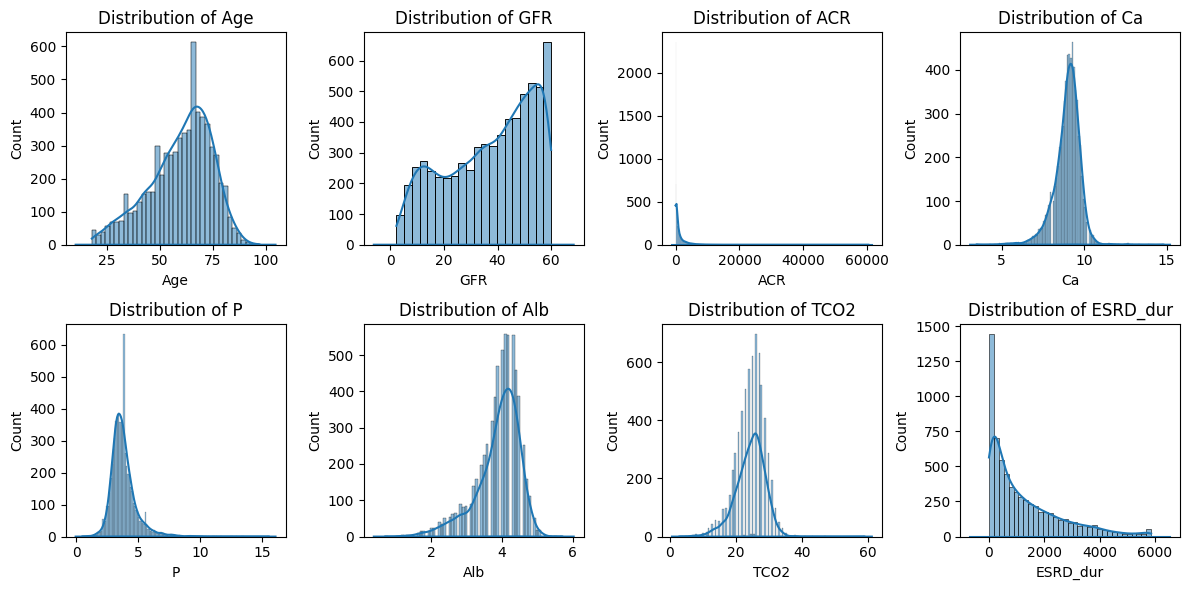

In [9]:
vars_of_interest = ["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
kde_distributions(
    df=df_eda,
    dist_list=dist_list,
    x=12,
    y=6,
    kde=True,
    n_rows=2,
    n_cols=4,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="count_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,  # List of variables of interest
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    single_var_image_filename="count_single_distribution",
    y_axis="count",
    plot_type="both",
)

### Density Distributions

#### Density Histograms

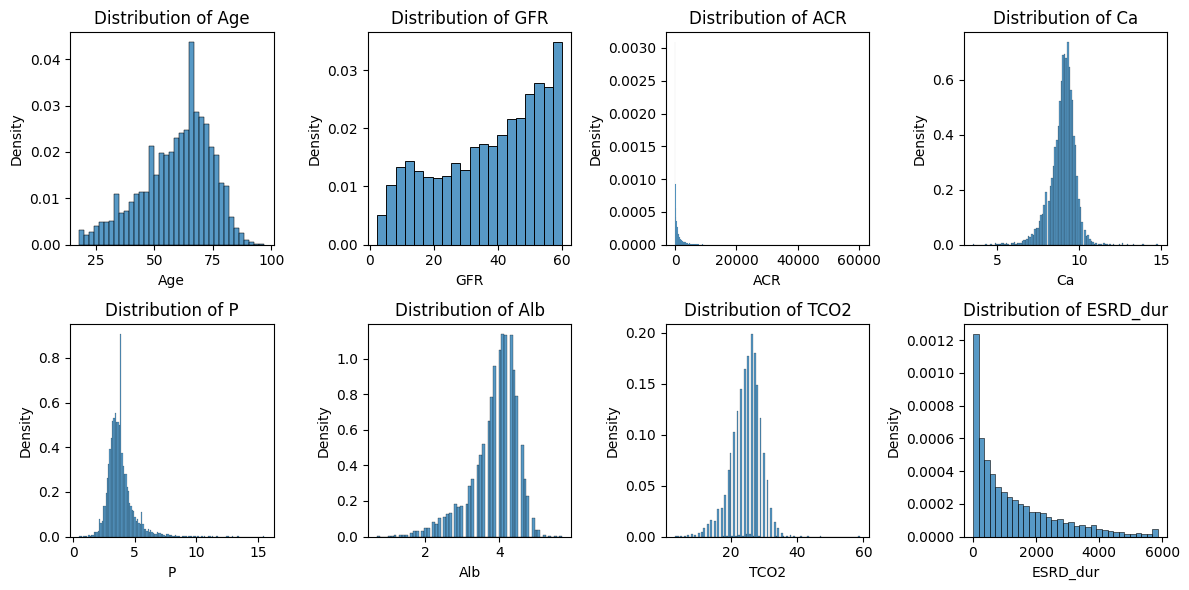

In [10]:
vars_of_interest = ["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
kde_distributions(
    df=df_eda,
    dist_list=dist_list,
    x=12,
    y=6,
    kde=True,
    n_rows=2,
    n_cols=4,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="density_hist_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,  # List of variables of interest
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    single_var_image_filename="density_hist_single_distribution",
    y_axis="density",
    plot_type="hist",
)

#### Density KDE Plots

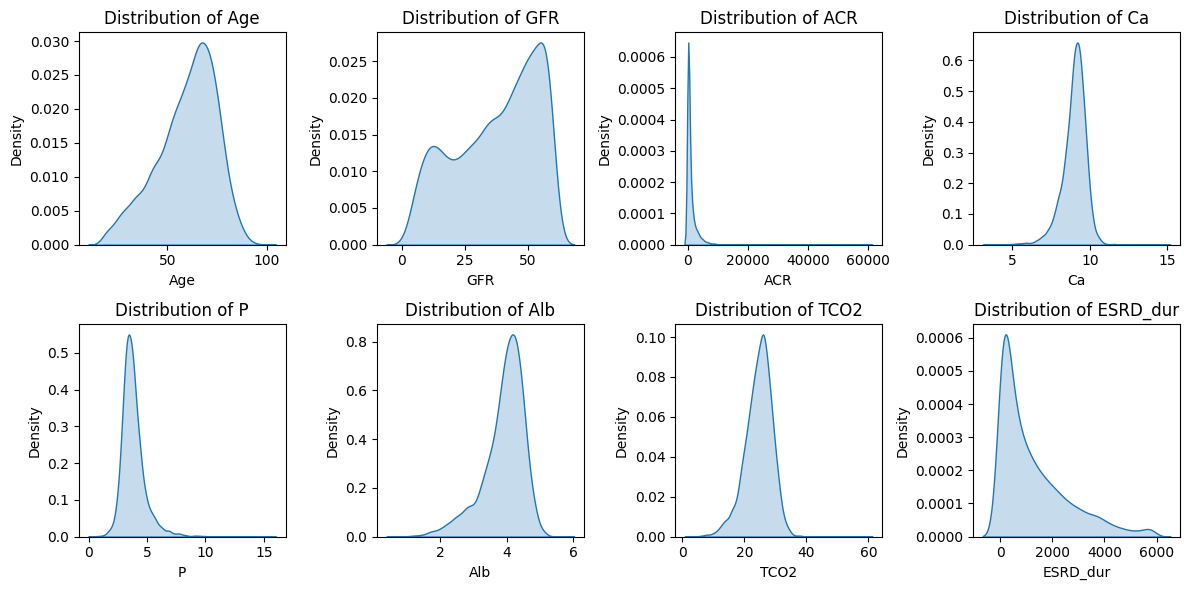

In [11]:
vars_of_interest = ["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
kde_distributions(
    df=df_eda,
    dist_list=dist_list,
    x=12,
    y=6,
    kde=True,
    n_rows=2,
    n_cols=4,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="hist_density_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,  # List of variables of interest
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    single_var_image_filename="hist_density_single_distribution",
    y_axis="density",
    plot_type="kde",
)

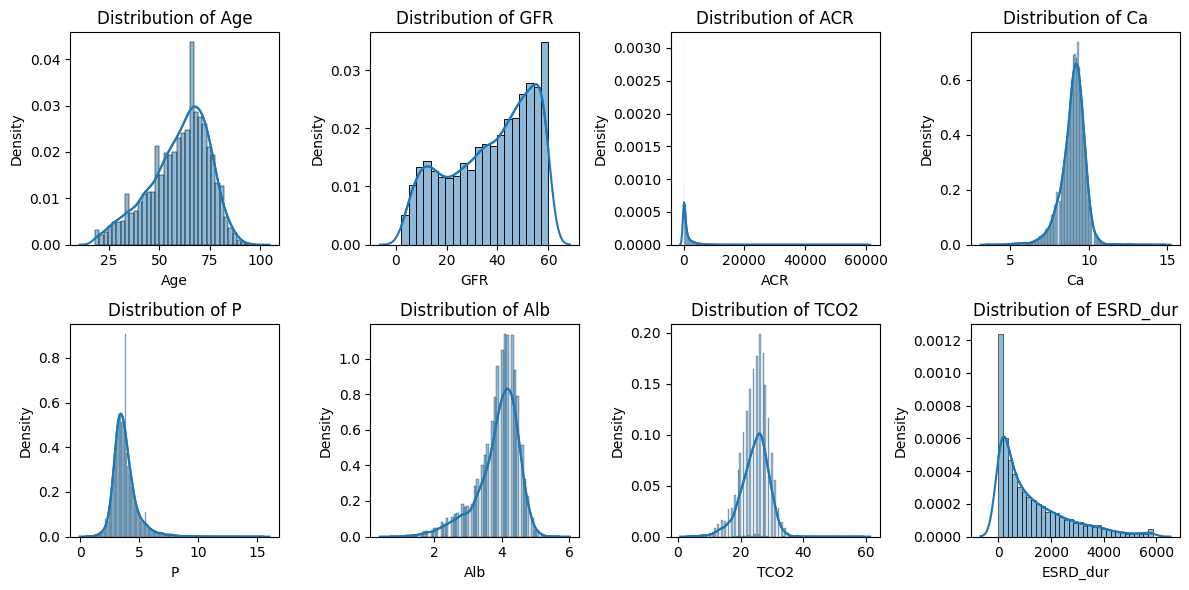

In [12]:
vars_of_interest = ["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
kde_distributions(
    df=df_eda,
    dist_list=dist_list,
    x=12,
    y=6,
    kde=True,
    n_rows=2,
    n_cols=4,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="kde_density_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,  # List of variables of interest
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    single_var_image_filename="kde_density_single_distribution",
    y_axis="density",
    plot_type="both",
)

## Age-Related Distributions

In [13]:
bin_ages = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100, float("inf")]
label_ages = [
    "< 18",
    "18-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100 +",
]


df_eda["Age_Group"] = pd.cut(df_eda["Age"], bins=bin_ages, labels=label_ages)

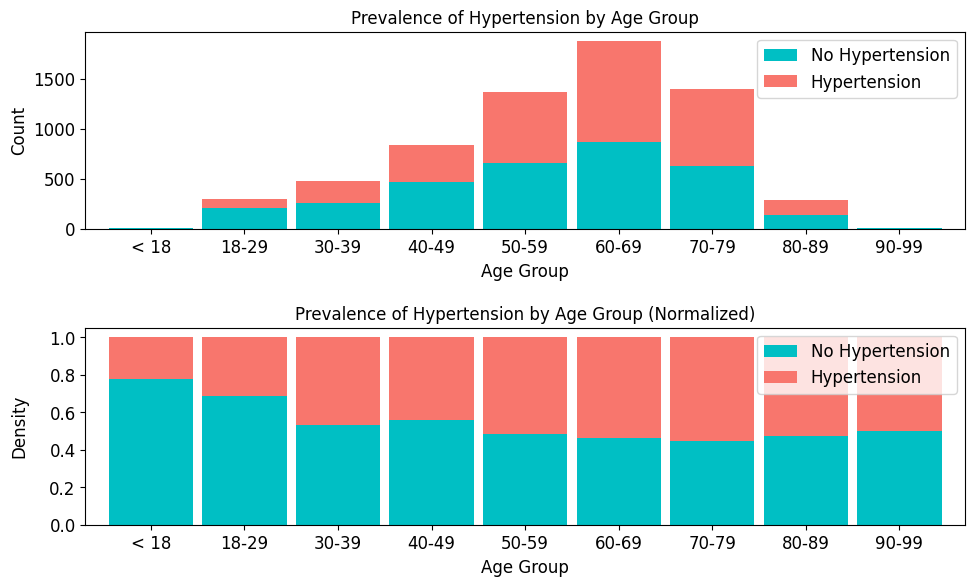

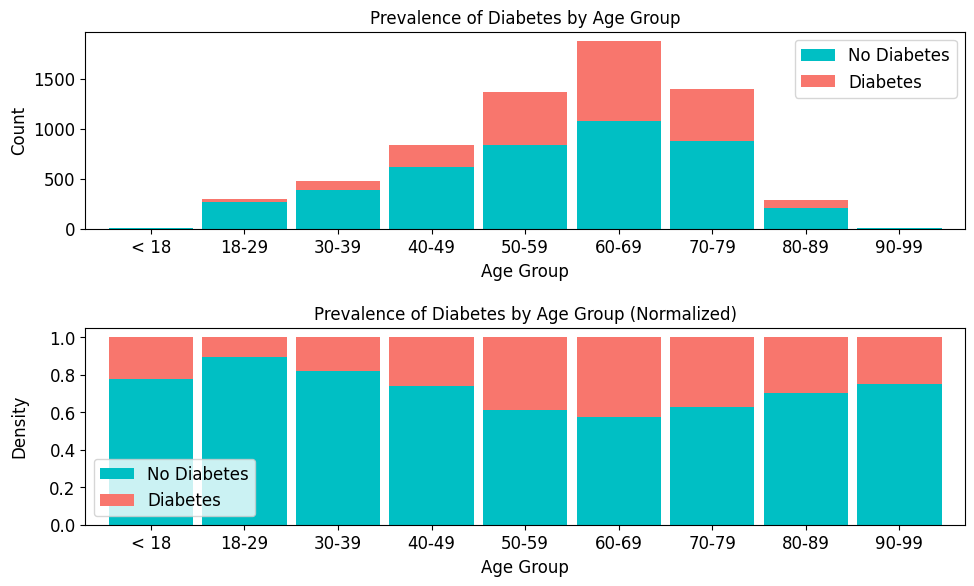

Crosstab for Hypertension:


HTN,No Hypertension,Hypertension,Total,Hypertension_%,No Hypertension_%,Total_%
Age_Group,,,,,,
< 18,7,2,9,22.0,78.0,100.0
18-29,204,93,297,31.0,69.0,100.0
30-39,256,224,480,47.0,53.0,100.0
40-49,471,371,842,44.0,56.0,100.0
50-59,656,707,1363,52.0,48.0,100.0
60-69,869,1006,1875,54.0,46.0,100.0
70-79,627,773,1400,55.0,45.0,100.0
80-89,137,154,291,53.0,47.0,100.0
90-99,6,6,12,50.0,50.0,100.0


Crosstab for Diabetes:


DM,No Diabetes,Diabetes,Total,Diabetes_%,No Diabetes_%,Total_%
Age_Group,,,,,,
< 18,7,2,9,22.0,78.0,100.0
18-29,266,31,297,10.0,90.0,100.0
30-39,393,87,480,18.0,82.0,100.0
40-49,621,221,842,26.0,74.0,100.0
50-59,836,527,1363,39.0,61.0,100.0
60-69,1076,799,1875,43.0,57.0,100.0
70-79,876,524,1400,37.0,63.0,100.0
80-89,204,87,291,30.0,70.0,100.0
90-99,9,3,12,25.0,75.0,100.0


In [14]:
func_col_used = ["HTN", "DM"]  # List to store the columns used
# Define the func_col to use in the loop
func_col = ["HTN", "DM"]

# Define the legend_labels to use in the loop
legend_labels_list = [["No Hypertension", "Hypertension"], ["No Diabetes", "Diabetes"]]

# Define titles for the plots
title = ["Hypertension", "Diabetes"]

stacked_crosstab_plot(
    x=12,
    y=8,
    p=10,
    df=df_eda,
    col="Age_Group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Analysis",  # Prefix for the filename
    kind="bar",
    width=0.9,
    rot=0,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_formats=["png", "svg"],
    color=["#00BFC4", "#F8766D"],  # Example colors
    output="both",  # Change this to "plots_only", "crosstabs_only", or "both"
    return_dict=False,  # Do not return the dictionary
)

## Summarize All Possible Combinations of Age, Sex, Diabetes and Hypertension

In [15]:
unique_vars = ["Age_Group", "SEX", "HTN", "DM"]
summary_tables, all_combinations = summarize_all_combinations(
    df=df_eda,
    data_path=data_output,
    variables=unique_vars,
    data_name="summary_tables.xlsx",
)

Data saved to ..\data_output/summary_tables.xlsx


In [16]:
all_combinations

[('Age_Group', 'SEX'),
 ('Age_Group', 'HTN'),
 ('Age_Group', 'DM'),
 ('SEX', 'HTN'),
 ('SEX', 'DM'),
 ('HTN', 'DM'),
 ('Age_Group', 'SEX', 'HTN'),
 ('Age_Group', 'SEX', 'DM'),
 ('Age_Group', 'HTN', 'DM'),
 ('SEX', 'HTN', 'DM'),
 ('Age_Group', 'SEX', 'HTN', 'DM')]